In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import random
import numpy as np
from scipy import stats

In [13]:
tiempo = 'Tiempo de ejecución (en nanosegundos)'
n = 'n'
m = 'm'
p = 'p'
ns = 'ns'
it = 'it'
diff = 'diff'
calidad = 'Diferencia vs solución exacta'

error_rate = 'Porcentaje de error: {0:2.2f}%'

blue='#4C72B0'
green='#55A868'
red='#C44E52'

In [14]:
greedy = pd.read_csv('pathological-greedy.csv')
greedy = greedy.groupby([n, m,diff]).min().reset_index()
local = pd.read_csv('pathological-local.csv')
local = local.groupby([n, m,diff]).min().reset_index()
grasp = pd.read_csv('pathological-grasp.csv')
grasp = grasp.groupby([n, m,diff]).min().reset_index()
grasp2 = pd.read_csv('pathological-grasp-2.csv')
grasp2 = grasp2.groupby([n, m,diff]).min().reset_index()

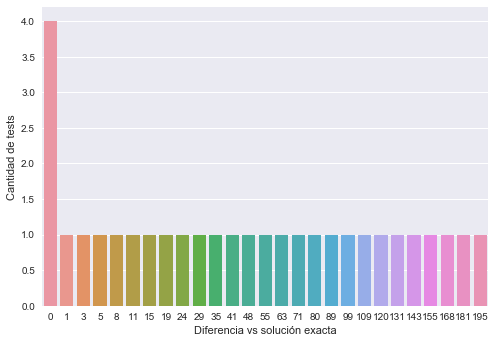

Porcentaje de error: 86.67%


,n,m,diff,ns
max,271.000000,360.000000,195.000000,13200.000000
mean,102.666667,128.000000,63.266667,7102.533333
std,83.211543,110.980582,61.710075,3629.222238


In [15]:
g = sns.countplot(x=diff, data=greedy)
g.set_xlabel(calidad)
g.set_ylabel("Cantidad de tests")
plt.show()

greedy_count = greedy.groupby([diff])[n].agg(['count']).reset_index()
greedy_sum = greedy_count['count'].agg(['sum']).get(0)

percent = (greedy_sum - greedy_count['count'][0])/greedy_sum
print(error_rate.format(percent*100))

greedy.agg(['max', 'mean', np.std])

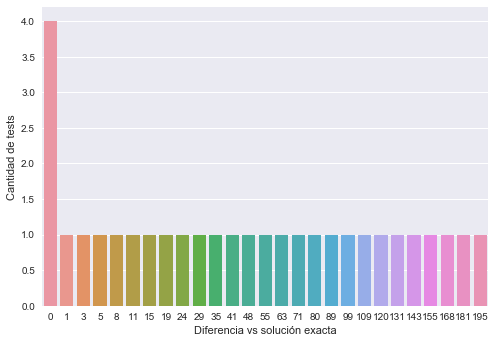

Porcentaje de error: 86.67%


,n,m,diff,ns
max,271.000000,360.000000,195.000000,46304.000000
mean,102.666667,128.000000,63.266667,25391.733333
std,83.211543,110.980582,61.710075,12556.971159


In [16]:
g = sns.countplot(x=diff, data=local)
g.set_xlabel(calidad)
g.set_ylabel("Cantidad de tests")
plt.show()

local_count = local.groupby([diff])[n].agg(['count']).reset_index()
local_sum = local_count['count'].agg(['sum']).get(0)

percent = (local_sum - local_count['count'][0])/local_sum
print(error_rate.format(percent*100))

local.agg(['max', 'mean', np.std])

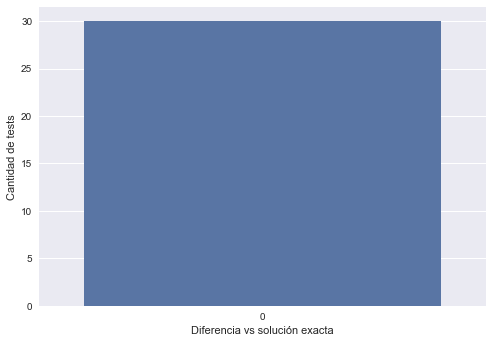

Porcentaje de error: 0.00%


,n,m,diff,p,it,ns
max,271.000000,360.000000,0.0,6.000000e-01,50.0,6.805607e+07
mean,102.666667,128.000000,0.0,6.000000e-01,50.0,1.919702e+07
std,83.211543,110.980582,0.0,1.129203e-16,0.0,1.974703e+07


In [17]:
g = sns.countplot(x=diff, data=grasp)
g.set_xlabel(calidad)
g.set_ylabel("Cantidad de tests")
plt.show()

grasp_count = grasp.groupby([diff])[n].agg(['count']).reset_index()
grasp_sum = grasp_count['count'].agg(['sum']).get(0)

percent = (grasp_sum - grasp_count['count'][0])/grasp_sum
print(error_rate.format(percent*100))

grasp.agg(['max', 'mean', np.std])

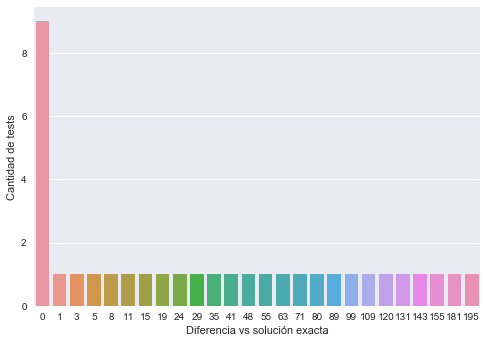

Porcentaje de error: 73.53%


,n,m,diff,p,it,ns
max,550.000000,630.000000,195.000000,6.000000e-01,50.0,2.463868e+07
mean,280.470588,302.441176,50.882353,6.000000e-01,50.0,1.030024e+07
std,172.515829,202.718373,58.843792,1.126919e-16,0.0,7.353826e+06


In [18]:
g = sns.countplot(x=diff, data=grasp2)
g.set_xlabel(calidad)
g.set_ylabel("Cantidad de tests")
plt.show()

grasp2_count = grasp2.groupby([diff])[n].agg(['count']).reset_index()
grasp2_sum = grasp2_count['count'].agg(['sum']).get(0)

percent = (grasp2_sum - grasp2_count['count'][0])/grasp2_sum
print(error_rate.format(percent*100))

grasp2.agg(['max', 'mean', np.std])